# 기계학습 실습 2: Classification (24.10.29)

- 실습과제 제출일: 11월 7일(목) 오후 2시 59분

학번: 2019160102

이름:이윤영


학습 목표:
- scikit-learn의 다양한 classifier을 구현하고 decision boundary의 시각화를 통해 모델의 차이를 알 수 있다.
- Binary & multiclass classification 모델의 성능을 평가하고 해석할 수 있다.

**목차:**
- Iris Dataset:
  - Perceptron
  - Logistic Regression
  - Support Vector Machine(SVM)
  - Naive Bayes
  - Decision Tree
  - Random Forest
  - K-Nearest Neighbor(KNN)
  - Multilayer Perceptron(MLP)
- MNIST 784 Dataset:
  - **Binary** Classification Model Evaluation
    - Confusion Matrix
    - Precision and Recall
    - F1 Score
    - Precision/Recall Trade-off
    - PR Curve
    - ROC Curve
  - **Multiclass** Classification Model Evaluation
    - One vs. One(OvO) / One vs. Rest(OvR)
    - MNIST Error Analysis

In [2]:
# imports and setups
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
np.random.seed(42)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
np.set_printoptions(precision=4, suppress=True)

In [3]:
# decision boundary 시각화 함수
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, ttl, test_idx=None, resolution=0.02):
    if ttl == 'Decision Tree' or ttl == "Random Forest":
      X = np.vstack((X_train, X_test))
    else:
      X = np.vstack((X_train_std, X_test_std))
    y = np.hstack((y_train, y_test))

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    targets = ["Setosa", "Versicolor", "Virginica"]

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.figure(figsize=(6,4))
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(ttl)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=targets[cl],
                    edgecolor='black')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## Iris Dataset

- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

<img src="https://miro.medium.com/v2/resize:fit:1400/0*11IwZmSKXw77eYz5" width=500>

**데이터셋 및 과제정의**:

- UCI Machine Learning Repository에서 제공하는 [Iris 데이터셋](https://archive.ics.uci.edu/dataset/53/iris) 사용
- 붓꽃의 세 가지 품종(Setosa, Versicolor, Virginica)에 대해 꽃받침 길이와 너비, 꽃잎 길이와 너비의 특성을 측정한 데이터

**과제(task) 구분**:

- 지도 학습 (Supervised Learning)
- 분류 모델 (Classification Model) - 다중 분류 모델 (Multiclass Classification)

**분류 모델의 성능 지표**:
- Accuracy, precision/recall/F1
- AUROC/AUPRC

**분류 모델의 Loss Function**:

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*hC94sOK3bB4junpyRMnXwg.png" width=650>

- Loss function = objective function = cost function
  - 모델의 예측 값과 실제 값 사이의 차이(loss)를 정량화하는 함수로 기계학습에서 최적화하고자 하는 것
  - 많은 종류의 loss function이 존재 (PyTorch Loss Function [참고](https://pytorch.org/docs/stable/nn.html#loss-functions))

- Regression & Classification Loss Function:

<img src="https://deepgram.com/_next/image?url=https%3A%2F%2Fwww.datocms-assets.com%2F96965%2F1712769854-screen-shot-2024-04-10-at-10-24-08-am.png&w=1920&q=75" width=650>

- Binary Cross Entropy Loss (BCE Loss=Logistic(log) loss):
  - 모델이 예측한 확률과 실제 target class 사이의 거리 측정

<img src="https://framerusercontent.com/images/Uv99ycEbCZhjnE6HQdTbMaQHs.webp" width=550>


<img src="https://framerusercontent.com/images/KyrSn9Wx4SQg991VWauPrqjmw.webp" width=550>



<img src="https://miro.medium.com/v2/resize:fit:1400/1*56ca0zyxjOl7gwIsR_5XwA.png" width=650>

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# TODO 1:
# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
print('Class labels:', np.unique(y, return_counts=True))



Class labels: (array([0, 1, 2]), array([50, 50, 50]))


In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# 데이터 출력
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# 시각화를 위해 1번째 열 sepal length, 2번째 열 sepal width만 사용:
X = X[:, [0, 1]]

In [8]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [9]:
# 70% 훈련 데이터, 30% 테스트 데이터
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# stratify 확인:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [11]:
# 데이터 표준화:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # 주의: test set의 분포는 scaling에 포함하지 않음

### Perceptron
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Perceptron.html

<img src="https://vtupulse.com/wp-content/uploads/2020/12/image.png" width=650>

In [12]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)
print('Perceptron accuracy: %.3f' % ppn.score(X_test_std, y_test))

Perceptron accuracy: 0.578


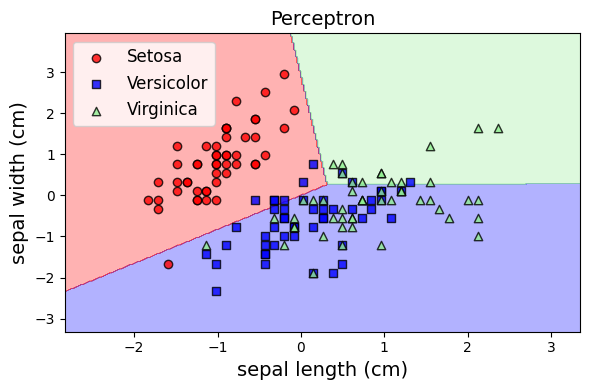

In [13]:
plot_decision_boundary(ppn, "Perceptron")

### Logistic Regression
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

<img src="https://vitalflux.com/wp-content/uploads/2022/03/logistic-regression-model-3.png" width=650>

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Logistic regression accuracy: %.3f' % lr.score(X_test_std, y_test))

Logistic regression accuracy: 0.778


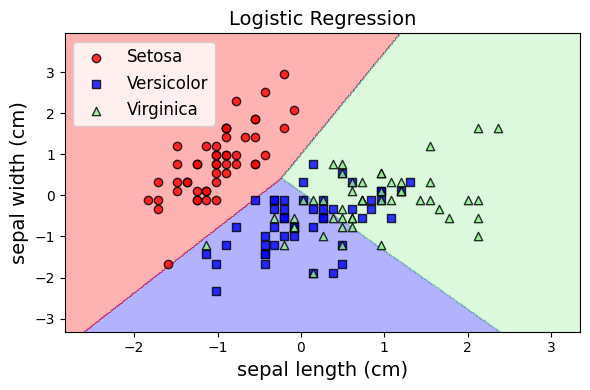

In [15]:
plot_decision_boundary(lr, "Logistic Regression")

### Support Vector Machine(SVM)
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html

<img src="https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg" width=600>

<img src="https://i.sstatic.net/obcn9.png" width=500>

- Hyperplane: 데이터를 나누는 경계선 혹은 면으로, 이를 기준으로 데이터를 다른 클래스에 분류
- Support Vector: 마진 경계에 닿는 입력 벡터
- Margin: 분리 hyperplane와 각 클래스에서 가장 가까운 데이터 포인트들(서포트 벡터) 사이의 거리
  - SVM은 이 *마진을 최대화*하는 hyperplane을 찾아내어 데이터를 분류함

<img src="https://miro.medium.com/v2/resize:fit:1400/1*mCwnu5kXot6buL7jeIafqQ.png" width=400>

- Kernel Trick: 선형 분리가 불가능한 데이터를 더 높은 차원으로 변환하여 선형 분류가 가능하도록 만드는 방법

  - 커널 함수를 사용해 데이터 점 쌍 간의 유사성을 측정하고, 그 공간에서 데이터의 좌표를 명시적으로 계산하지 않고도 더 높은 차원 공간에서 계산을 수행
  - 예시: 다항식 커널, 가우시안 커널, RBF 커널

- 정규화 파라미터 $C$: 마진을 최대화하는 것과 학습 오류를 최소화하는 것 사이의 균형을 조절
   - 큰 $C$ 값:더 좁은 마진을 감수하고 올바른 분류를 우선시. 과적합의 가능성이 있음.
   - 작은 $C$ 값: 모델이 더 많은 오류를 감수하고 마진을 최대화하여 일반화 성능을 높임.

In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_std, y_train)
print('SVM accuracy: %.3f' % svm.score(X_test_std, y_test))

SVM accuracy: 0.689


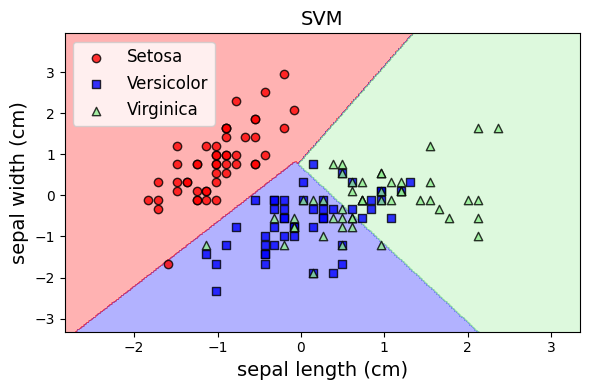

In [17]:
plot_decision_boundary(svm, "SVM")

`gamma`:
- 하나의 데이터포인트가 영향을 미치는 거리를 정의하며, 낮은 값은 ‘멀리’까지, 높은 값은 ‘가까이’까지 영향을 미침을 의미
- 모델이 서포트 벡터로 선택한 샘플의 영향 반경의 역수로 볼 수 있음
- 참고: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [18]:
# TODO 2: high gamma
rbf_svm_hg = SVC(kernel='rbf', C=1.0, gamma=10, random_state=42)
rbf_svm_hg.fit(X_train_std, y_train)
print('RBF kernel SVM accuracy: %.3f' % rbf_svm_hg.score(X_test_std, y_test))

RBF kernel SVM accuracy: 0.756


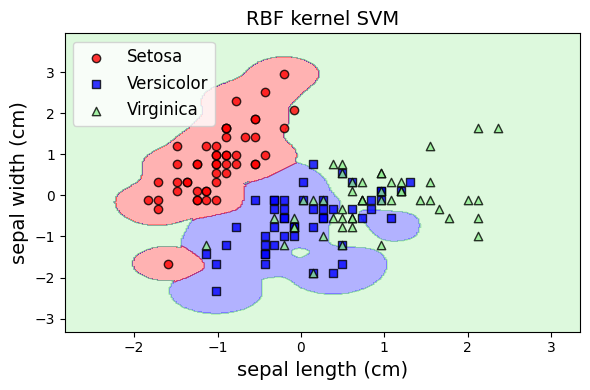

In [19]:
plot_decision_boundary(rbf_svm_hg, "RBF kernel SVM")

In [20]:
# TODO 2: low gamma
rbf_svm_lg = SVC(kernel='rbf', C=10, gamma=1.0, random_state=42)
rbf_svm_lg.fit(X_train_std, y_train)
print('RBF kernel SVM accuracy: %.3f' % rbf_svm_lg.score(X_test_std, y_test))

RBF kernel SVM accuracy: 0.733


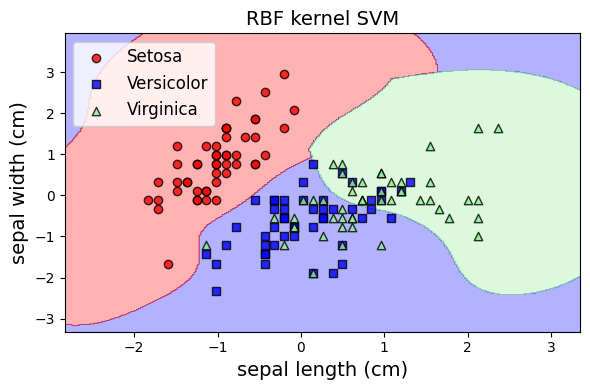

In [21]:
plot_decision_boundary(rbf_svm_lg, "RBF kernel SVM")

`SGDClassifier`:
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html


```python
# Scikit-learn에서의 다른 구현 방법:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
```


**Stochastic Gradient Descent(SGD)**:

<img src="https://miro.medium.com/v2/resize:fit:1005/1*_6TVU8yGpXNYDkkpOfnJ6Q.png" width=500>

- Loss function을 최적화하는 알고리즘 중 하나. Loss function의 gradient을 계산하여 loss을 줄이기위해 parameter을 어느 방향으로 이동해야 하는지, 얼마나 이동해야 하는지 결정
- 데이터 세트의 하나의 랜덤(stochastic) 데이터 포인트만을 사용하여 매 반복마다 parameter를 업데이트함으로써 계산 workload을 줄일 수 있음. (실용적)
- SGD외에도 다양한 알고리즘 존재 (PyTorch Optimization Algorithm [참고](https://pytorch.org/docs/stable/optim.html#algorithms))


**Linear Regression의 예시**:
- Linear regression MSE Loss:
$$\frac{1}{N}\sum_{i=1}^{N}(y_i-(mx_i+b))^2$$

- MSE Loss gradient (intercept):
$$\frac{2}{N}\sum_{i=1}^{N}-(y_i-(mx_i+b))$$

- MSE Loss gradient (slope):
$$\frac{2}{N}\sum_{i=1}^{N}-x_i(y_i-(mx_i+b))$$

 - gradient 자체는 ascent 방향이며, loss을 줄이는 것이 목표기에 gradient의 음수를 취하여 descent 방향으로 이동

<img src="https://chengjun.github.io/mybook/_images/gradient.gif" width=800>

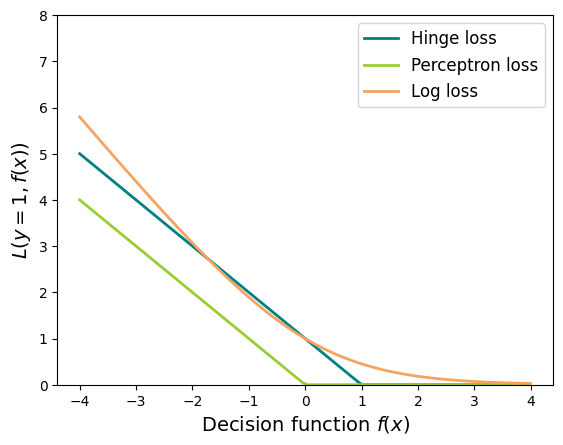

In [22]:
# 위 loss 시각화
import matplotlib.pyplot as plt
import numpy as np

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color="teal", lw=lw, label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=lw, label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color="sandybrown", lw=lw, label="Log loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

**SVM의 Hinge Loss**:

<img src="https://iq.opengenus.org/content/images/2023/04/hloss.png" width=450>

* \+ 레이블과 \- 레이블을 분류하는 decision boundary을 그었을 때:

<img src="https://intuitivetutorial.com/wp-content/uploads/2023/01/svm_plane.png" width=400>

* 잘못 분류된 데이터 포인트들은 항상 $yf(x)$가 음수:

<img src="https://intuitivetutorial.com/wp-content/uploads/2023/01/svm_plane_2.png" width=400>

### Naive Bayes
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*gIOMPKD_WWPK77D4THkvQg.png" width=550>

**Gaussian Naive Bayes Classifier**:

 - 베이즈 정리(Bayes Theorem)에 기반한 확률적 분류기로, 특정 사건과 관련이 있을 수 있는 조건에 대한 사전 지식을 바탕으로 사건의 확률을 계산
 - 머신러닝에서는 특징들이 정규(Gaussian) 분포를 따른다고 가정하며, "나이브(Naive)"라는 이름은 특징들 간의 독립성을 가정하는 데서 비롯되었으며, 이로 인해 확률 계산이 단순해짐.

 <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*vfcue7SpRnDoyqGuj9NJMg.png" width=400>

 - Gaussian Naive Bayes는 각 클래스 $y_k$ 내의 각 특징 $x_i$에 대한 우도(likelihood) $ P(x_i|y)$가 정규 분포를 따른다고 가정함.
 - 새로운 데이터 포인트 $x$를 분류하기 위해, 알고리즘은 각 클래스의 사후 확률의 최대값을 찾아 해당 클래스에 데이터 포인트를 할당


In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_std, y_train)
print('Naive Bayes accuracy: %.3f' % nb.score(X_test_std, y_test))

Naive Bayes accuracy: 0.689


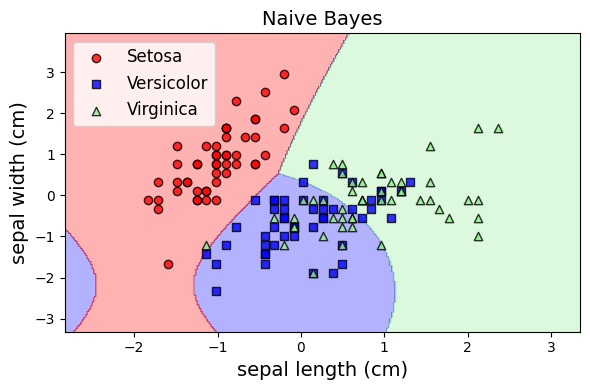

In [24]:
plot_decision_boundary(nb, "Naive Bayes")

### Decision Tree
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)
print('Decision tree accuracy: %.3f' % dt.score(X_test, y_test))

Decision tree accuracy: 0.733


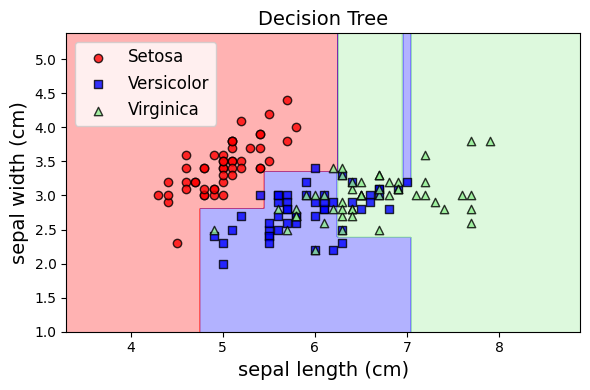

In [26]:
plot_decision_boundary(dt, "Decision Tree")

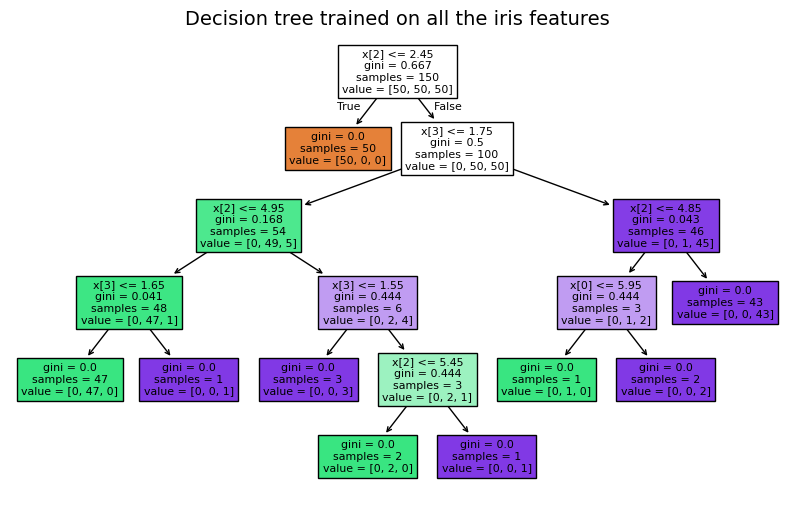

In [27]:
# iris data의 모든 특성에 대해 훈련된 decision tree 시각화:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(iris.data, iris.target) # 모든 특성에 대해 훈련
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

### Random Forest
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<img src="https://miro.medium.com/v2/resize:fit:1400/1*vqVqPAD7nQ-yrodX40m9Dg.png" width=500>

- Random Forest의 최종 결정을 majority voting으로 할 수 있으나, Scikit-learn의 구현은 분류기의 확률 예측을 평균하여 결합

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=2)
rf.fit(X_train, y_train)
print('Random Forest accuracy: %.3f' % rf.score(X_test, y_test))

Random Forest accuracy: 0.711


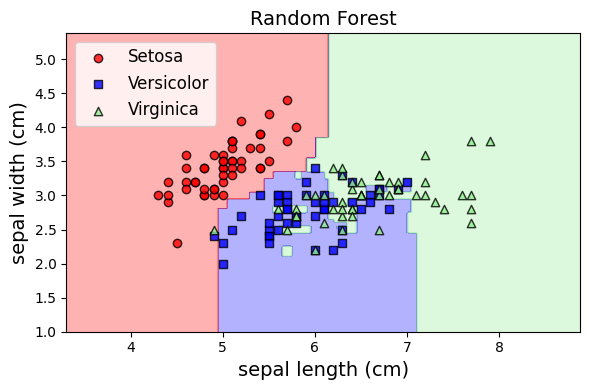

In [29]:
plot_decision_boundary(rf, "Random Forest")

### K-Nearest Neighbor (KNN)
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fb38b5247-7a89-4ae2-9c48-3fc3d28a7ed1_1192x1044.png" width=500>

**Minkowski distance**:

<img src="https://miro.medium.com/max/451/0*HLw6nHhJescO2YJN" width=300>

<img src="https://www.researchgate.net/publication/349155159/figure/fig1/AS:989596292767746@1612949550717/Three-typical-Minkowski-distances-ie-Euclidean-Manhattan-and-Chebyshev-distances.png" width=550>

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
print('KNN accuracy: %.3f' % knn.score(X_test_std, y_test))

KNN accuracy: 0.689


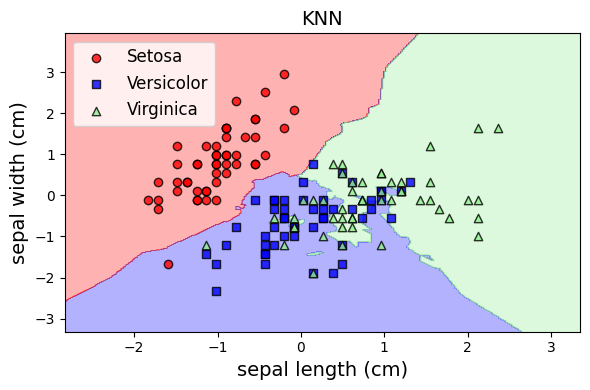

In [31]:
plot_decision_boundary(knn, "KNN")

### Multilayer Perceptron (MLP)
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html

<img src="https://media.springernature.com/lw1200/springer-static/image/art%3A10.1007%2Fs10115-023-01959-7/MediaObjects/10115_2023_1959_Fig2_HTML.png" width=650>

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(40,20,10,), solver = 'lbfgs',
                   random_state=42, max_iter=1000)
mlp.fit(X_train_std, y_train)
print('MLP accuracy: %.3f' % mlp.score(X_test_std, y_test))

MLP accuracy: 0.800


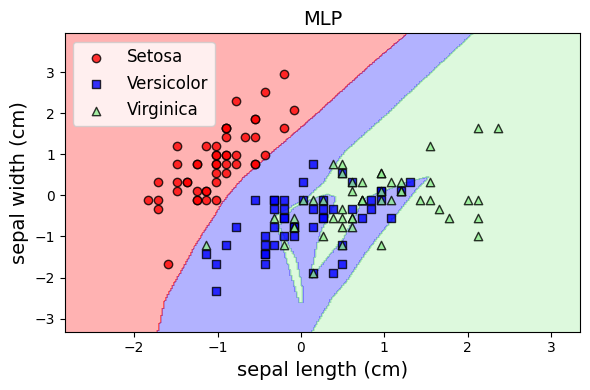

In [33]:
plot_decision_boundary(mlp, "MLP")

## MNIST 784 Dataset

<img src="https://lh6.googleusercontent.com/proxy/vFxhyOsJBq2tnpULqxqNwti2RnyFk5gcKmx4btmedz3QNTOUlpEhVGXV5R_B2uzWnqExeYdkVvv44W49ww" width=500>

- `fetch_openml`: https://scikit-learn.org/1.5/datasets/loading_other_datasets.html#openml
- MNIST 784 dataset: https://www.openml.org/search?type=data&status=active&id=554
 - LeCun, Y. (1998). The MNIST database of handwritten digits. http://yann.lecun.com/exdb/mnist/.

In [34]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [35]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
X.shape

(70000, 784)

In [37]:
28 * 28

784

In [38]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [39]:
y.shape


(70000,)

In [40]:
# 클래스 비율 확인:
uniques, counts = np.unique(y, return_counts=True)
dict(zip(uniques, counts * 100 / len(y)))

{'0': 9.861428571428572,
 '1': 11.252857142857144,
 '2': 9.985714285714286,
 '3': 10.201428571428572,
 '4': 9.748571428571429,
 '5': 9.018571428571429,
 '6': 9.822857142857142,
 '7': 10.418571428571429,
 '8': 9.75,
 '9': 9.94}

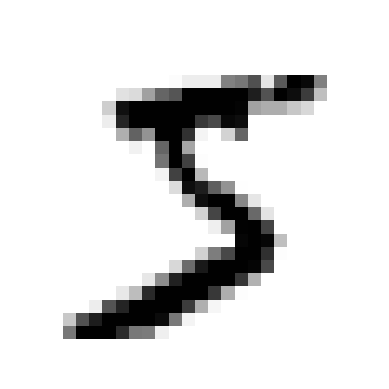

In [41]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [42]:
# 픽셀값 범위: 0(흰색) ~ 255(검은색)
some_digit.reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [43]:
y[0]

'5'

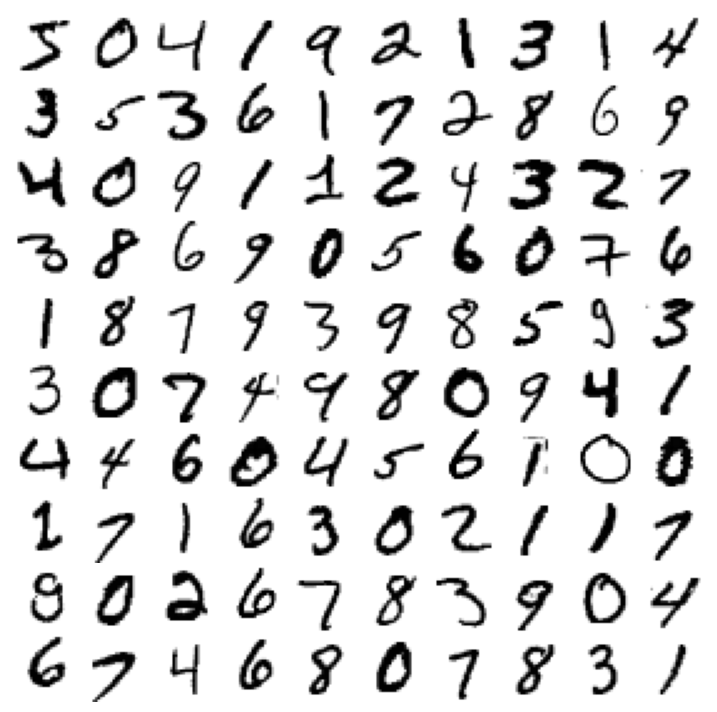

In [44]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [45]:
# fetch_openml()로 반환된 MNIST 데이터셋은 이미 나누어져 있으며,
# 첫 60,000개 이미지는 훈련 세트, 마지막 10,000개 이미지는 테스트 세트로 구성
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [46]:
X_train.shape

(60000, 784)

In [47]:
X_test.shape

(10000, 784)

### **Binary** Classification Model Evaluation

In [48]:
# 문제를 단순화하여 MNIST을 binary problem으로 전환(5는 True고, 다른 숫자는 모두 False):
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

`SGDClassifier`:
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html

In [49]:
# 실행에 시간이 걸릴 수 있음
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss', random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(loss='log_loss', random_state=42)

In [50]:
# TODO 3:
sgd_clf.predict([some_digit])


array([ True])

In [51]:
# TODO 3:
sgd_clf.predict_proba([some_digit])

array([[0., 1.]])

In [52]:
# TODO 3:
sgd_clf.predict_proba([some_digit])[:,1]


array([1.])

In [53]:
# 실행에 시간이 걸릴 수 있음
# 3-fold CV로 성능 측정:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9599, 0.9695, 0.9675])

In [54]:
# 모든 이미지를 가장 빈번한 클래스로 분류하는 더미 분류기:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # 출력 결과: False, 5가 감지되지 않음

False


In [55]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9096, 0.9096, 0.9096])

- 데이터셋이 불균형할 때 accuracy은 성능 측정 지표로 선호되지 않음

#### Confusion Matrix

<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width=500>

- recall = sensitivity = true positive rate (TPR)

In [56]:
# confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

`cross_val_predict`:
- doc: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.cross_val_predict.html

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53870,   709],
       [ 1353,  4068]])

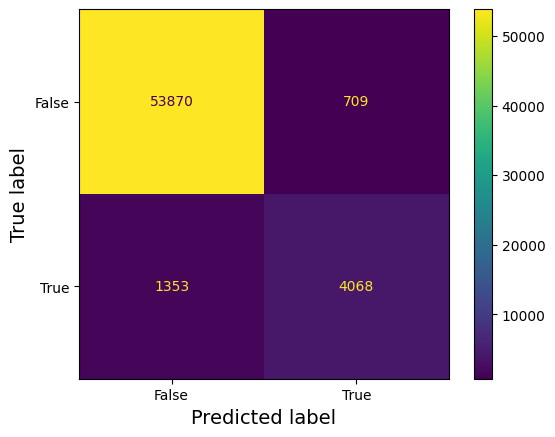

In [58]:
# 시각화
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

#### Precision and Recall

<img src="https://miro.medium.com/v2/resize:fit:888/1*7J08ekAwupLBegeUI8muHA.png" width=350>

In [59]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score

print(f"Precision: {precision_score(y_train_5, y_train_pred)}")  # == 3530 / (687 + 3530)
print(f"Recall: {recall_score(y_train_5, y_train_pred)}")   # == 3530 / (1891 + 3530)

Precision: 0.8515804898471844
Recall: 0.750415052573326


In [60]:
# confusion matrix으로부터 precision/recall 계산:
print(f"Precision: {cm[1, 1] / (cm[0, 1] + cm[1, 1])}")
print(f"Recall: {cm[1, 1] / (cm[1, 0] + cm[1, 1])}")

Precision: 0.8515804898471844
Recall: 0.750415052573326


#### F1 Score

<img src="https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/07/un-86.png?w=993&ssl=1" width=550>

In [61]:
# F1 score:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)
# cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7978034908805648

#### Precision/Recall Trade-off

- `SGDClassifier`의 분류 결정 과정:
 - 각 인스턴스에 대해 decision function에 기반한 점수 계산
 - 그 점수가 threshold보다 크면, 인스턴스를 양성 클래스로 분류. 그렇지 않으면 음성 클래스로 분류
- 위 그림에서 decision threshold가 중앙 화살표 위치에 있다고 가정 (두 개의 5 사이)
 - threshold 오른쪽에는 4개의 TP(True Positive, 실제 5)가 있고, 1개의 FP(False Positive, 실제 6)가 있음
   - 이 threshold에서 precision는 80% (5개 중 4개)
   - 하지만 6개가 존재하는 실제 5가 중, `SGDClassifier`가 4개만 찾아내므로 recall은 67% (6개 중 4개)
 - threshold을 높이면(오른쪽 화살표로 이동), FP(6)이 TN이 되어 precision이 증가
   - 하지만 하나의 TP가 FN으로 바뀌어 recall은 50%로 감소
 - 반대로, threshold을 낮추면 recall은 증가하고 precision은 감소

<img src="https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/07/un-87.png" width=650>

- Scikit-Learn은 threshold을 직접 설정할 수 있게 하지 않으나, 예측을 할 때 사용하는 decision score에는 접근 가능
- `SGDClassifier`의 `predict()` 메서드를 호출하는 대신, `decision_function()` 메서드를 호출하여 각 인스턴스에 대한 점수를 반환
- 원하는 threshold을 사용해 이 점수들을 바탕으로 예측할 수 있음.

In [62]:
# TODO 4:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1780.2212])

In [63]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [64]:
y_some_digit_pred

array([ True])

In [65]:
# threshold을 0에서 3000으로 변경:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

- threshold을 0에서 3000으로 높이면 recall 감소
  - 0일 경우 숫자 5을 올바르게 분류
  - 3000이 되었을 때 5을 올바르게 분류하지 못함

- 어떤 threshold을 사용할지 결정하는 방법:
 - 먼저 `cross_val_predict()` 함수를 사용해 훈련 세트의 모든 인스턴스에 대한 예측이 아닌 decision score 반환
   - doc: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.cross_val_predict.html
   - `method`: `{‘predict’, ‘predict_proba’, ‘predict_log_proba’, ‘decision_function’}`

In [66]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

- 이 score을 이용해 `precision_recall_curve()` 함수를 사용하여 모든 가능한 threshold에 대한 precision와 recall을 계산
- `precision_recall_curve()` 함수는 무한한 threshold에 해당하는 precision 0과 recall 1을 추가

#### PR Curve

In [67]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [68]:
thresholds, precisions

(array([-128645.5569, -116854.7458, -113758.2157, ...,   26572.903 ,
          27135.1705,   28645.6265]),
 array([0.0903, 0.0904, 0.0904, ..., 1.    , 1.    , 1.    ]))

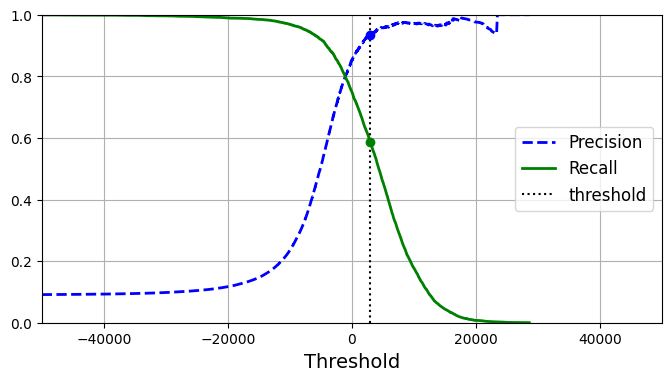

In [69]:
# threshold에 따른 precision & recall 시각화:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")


idx = (thresholds >= threshold).argmax()  # 첫 번째 index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()


- threshold 3000일 때, precision은 90%에 가까우며 recall은 50% 정도

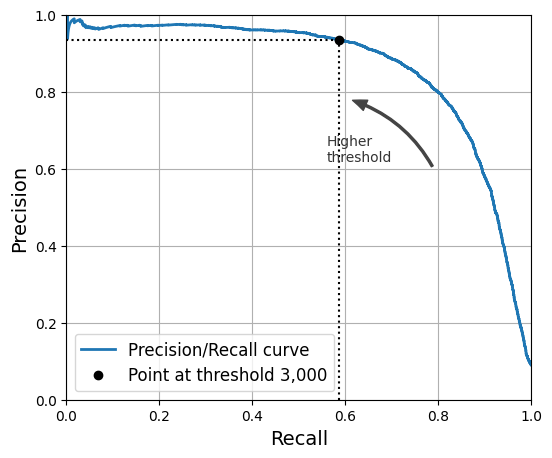

In [70]:
# PR Curve: precision을 recall에 직접 대조
import matplotlib.patches as patches
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

- recall 약 80% 부근에서 precision이 떨어지기 시작
- 이 급락 직전의 지점에서 precision/recall 균형을 선택하는 것이 좋을 수 있음. (예를 들어 recall 60% 정도에서 선택). 도메인에 따라 달라질 수 있음.

- Precision이 최소 90%이 되도록 모델의 decision threshold을 설정하는 방법:
 - NumPy의 `argmax()` 메서드를 사용하여 선택
   - doc: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
   - 이 메서드는 최대값의 인덱스를 반환하는데 최대값이 여러개일 경우 최대값들의 첫 번째 인덱스를 반환 (이 경우 첫 번째 `True` 값을 의미)

In [71]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

1372.1165469629132

- 90%의 precision을 내는 decision threshold 적용을 위해 `predict()` 메서드를 호출하는 대신 다음 코드를 실행:

In [72]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

- precision, recall 확인:

In [73]:
precision_score(y_train_5, y_train_pred_90)

0.9001221001221001

In [74]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.6799483490130972

#### ROC Curve

- Receiver Operating Characteristic(ROC) Curve:

<img src="https://i0.wp.com/sefiks.com/wp-content/uploads/2020/12/roc-curve-original.png?fit=726%2C576&ssl=1" width=500>

- ROC curve와 AUROC(Area Under the Receiver Operating Characteristic)은 분류에서 자주 사용되는 성능 지표
 - Precision/recall curve과 매우 유사하지만, ROC curve은 True Positive Rate(TPR=recall)와 False Positive Rate(FPR)을 대조하여 표시
   - FPR은 음성 인스턴스 중 양성으로 잘못 분류된 비율
 - FPR은 1 - True Negative Rate(TNR)과 같음.
   - TNR은 음성 인스턴스가 정확히 음성으로 분류된 비율이며, specificity라고도 함.
- 따라서 ROC curve은 sensitivity(recall) vs. 1 - specificity를 나타냄.

In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

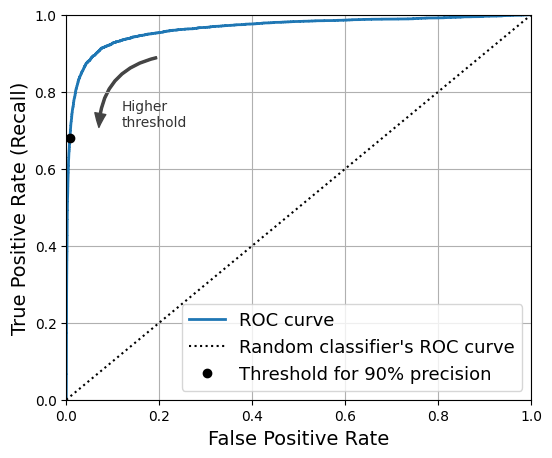

In [76]:
# 90% precision에 해당하는 지점을 찾기 위해 원하는 threshold의 인덱스를 확인:
# threshold가 내림차순으로 나열되어 있으므로 첫 번째 줄에서 >= 대신 <=를 사용
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9650798064853275

- AUPRC(Area Under Precision Recall Curve) vs AUROC의 사용:
 - 경험적으로, False Positive(FP)에 더 신경 쓸 때는 PR curve을 사용하는 것이 좋음.
   - 참고: McDermott, M., Hansen, L. H., Zhang, H., Angelotti, G., & Gallifant, J. (2024). [A closer look at auroc and auprc under class imbalance.](https://arxiv.org/abs/2401.06091) arXiv preprint arXiv:2401.06091.
 - 다른 모든 경우에는 AUROC을 사용
- 성능 개선을 위해 두 curve 모두 조사할 필요가 있음:
 - ROC curve와 AUROC을 보면 `SGDClassifier`가 성능이 뛰어나 모델을 개선할 필요가 없다고 생각할 수 있으나, 이는 양성(5)이 음성(5 이외)에 비해 적기 때문임.
 - 반면, PR curve을 보면 곡선이 오른쪽 위 모서리로 더 가깝게 이동하도록 모델 성능을 개선시킬 수 있음이 드러남.

In [78]:
# RandomForestClassifier를 생성하여 SGDClassifier와 비교
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

- `precision_recall_curve()` 함수의 입력: 각 인스턴스에 대한 라벨(True binary labels)과 점수(Target scores)를 필요로 함.
- 따라서 랜덤 포레스트 분류기를 훈련시키고 각 인스턴스에 점수를 할당하게 해야하지만 `RandomForestClassifier` 클래스는 작동 방식 때문에 `decision_function()` 메서드를 가지고 있지 않음
 - 그러나 `predict_proba()`을 통해 각 인스턴스에 대한 양성 클래스 확률을 반환하여 이를 점수로 사용

In [79]:
# 실행에 시간이 걸림:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [80]:
# 훈련 세트의 첫 두 이미지에 대한 클래스 확률을 확인:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

- 주의: 이 확률들은 추정된 확률이지 실제 확률이 아님
- 첫 번째 이미지가 양성일 확률: 89%로 예측
- 두 번째 이미지가 음성일 확률: 99%로 예측
 - 각 이미지가 양성 또는 음성 중 하나이므로, 각 행의 확률 합은 100%

In [81]:
# 추정 확률(estimated probabilities): 모델이 50%에서 60% 사이의 확률로 양성으로 분류한 이미지 중, 94%은 실제 양성 이미지
# 모델의 추정 확률이 실제보다 훨씬 낮음을 보여줌
# [:, 1]으로 양성 예측에 대한 확률만 사용
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [82]:
y_scores_forest = y_probas_forest[:, 1] # 두 번째 열(index=1)은 양성 클래스에 대한 예측 확률을 포함
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

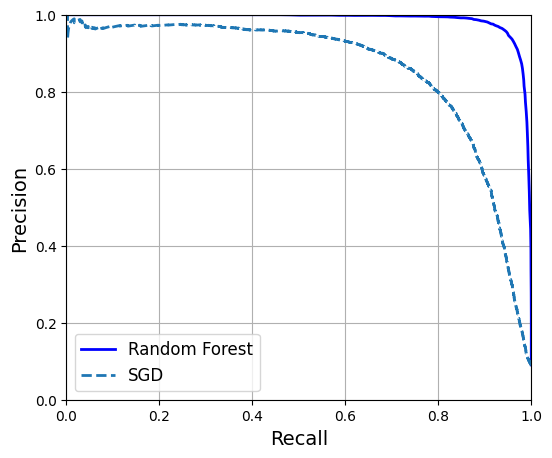

In [83]:
# SGDClassifier와 RandomForest의 PR Curve 시각화:
plt.figure(figsize=(6, 5))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [84]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # 양성 확률 ≥ 50%

In [85]:
# TODO 5
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [86]:
# TODO 5:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

In [87]:
# TODO 5:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [88]:
# TODO 5:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

### **Multiclass** Classification Model Evaluation

- Binary classifier는 두 클래스를 분류하지만, multiclass classifier는 두 개 이상의 클래스를 분류할 수 있음.
  -  FYI: Multilabel Classification, Multioutput Classification의 분야도 존재
    - Multilabel Classification: 여러개의 이진 class에 대해 예측
      - 예시: 숫자가 1) 6보다 큰지(T/F), 2) 홀수인지(T/F)에 대해 동시 예측
    - Multioutput Classification: 각 레이블은 두 개 이상의 가능한 값 다중 클래스
      - 예시: 숫자(0-9) 예측과 동시에 이미지 밝기(밝음, 중간, 어두움) 예측
- 일부 Scikit-Learn classifier(예: `LogisticRegression`, `RandomForestClassifier`, `GaussianNB`)는 다중 클래스를 자연스럽게 처리할 수 있음.
- `SGDClassifier`, `SVC`와 같은 classifier은 엄밀히 binary classifier임.
- 다중 클래스를 분류하기 위해 여러 이진 분류기를 사용하는 다양한 전략이 존재함.

#### One vs. One(OvO) / One vs. Rest(OvR)

<img src="https://aman.ai/primers/ai/assets/multiclass-vs-multilabel-classification/ovo-ovr.webp" width=700>

**OvO (One-vs-One) 전략:**
- 각 숫자 쌍마다 binary classifier를 훈련하여 0과 1을 구분하는 classifier, 0과 2를 구분하는 classifier, 1과 2를 구분하는 classifier 등으로 구성함.
- 이는 "One-vs-One" (OvO)이라 부르며, N개의 클래스가 있으면 N × (N – 1) / 2개의 classifier를 훈련해야 함.
  - MNIST 문제에서는 45개의 binary classifier를 훈련
  - 각 가능한 클래스 쌍에 대해 예측하는 classifier들이 내린 예측에서 가장 많은 투표를 받은 클래스의 레이블을 반환
- OvO의 주요 장점은 예측하고자 하는 두 클래스만 포함하는 데이터 부분집합으로만 훈련되어 데이터셋 크기에 따라 확장성이 떨어지는 알고리즘에 유리

**OvR (One-vs-Rest):**
- 10개의 클래스(숫자 0에서 9까지)를 분류하는 시스템을 만들기 위해, 각 숫자에 대해 10개의 binary classifier를 훈련할 수 있음 (예: 0 detector, 1 detector 등).
- 이미지 분류 시 각 classifier의 decision score를 구하고, 점수가 가장 높은 classifier의 클래스를 선택
- 이를 "One-vs-Rest" (OvR) 또는 "One-vs-All" (OvA)이라 부름.



**Scikit-Learn의 자동 다중 클래스 감지:**
- Scikit-Learn은 binary classification 알고리즘을 다중 클래스 분류에 사용하려고 할 때 이를 자동으로 감지하고, 알고리즘에 따라 OvR 또는 OvO를 자동으로 실행
- SVM classifier([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))를 사용하여 이를 시험해 볼 수 있음
  - `decision_function_shape`: 내부적으로 다중 클래스에서는 항상 One-vs-One(‘ovo’) 방식이 사용되어 모델을 훈련하고 OvR matrix은 OvO matrix에서 계산됨. 아래의 `# 추가 코드:` 참고 ([link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#:~:text=for%20no%20limit.-,decision_function_shape,-%7B%E2%80%98ovo%E2%80%99%2C%20%E2%80%98ovr%E2%80%99%7D%2C%20default))

In [89]:
# SVM은 대용량 데이터셋에 잘 맞지 않기 때문에 처음 2,000개의 샘플만 사용해 훈련:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
# y_train_5가 아니고 y_train을 사용
svm_clf.fit(X_train[:2000], y_train[:2000]) #OvO 적용되어 45개 classifier 훈련됨

SVC(random_state=42)

In [90]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [91]:
# 각 인스턴스에 대해 10개의 점수를 반환:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [92]:
# 가장 높은 점수는 9.3이며, 이는 실제로 클래스 5에 해당:
class_id = some_digit_scores.argmax()
class_id

5

- `classes_` 속성에 목표 클래스 목록을 저장하며, 값 순서대로 정렬됨.

In [93]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

- MNIST의 경우 `classes_` 배열의 각 클래스 인덱스가 해당 클래스와 일치하지만 다른 데이터셋은 그렇지 않을 수 있으므로, 아래 코드를 통하여 클래스 레이블을 찾을 수 있음

In [94]:
svm_clf.classes_[class_id]

'5'

In [95]:
# 추가 코드:
# decision_function()이 45개 점수를 반환하게 하려면 decision_function_shape 매개변수를 "ovo"로 지정
# 기본값은 "ovr"이지만 SVC는 항상 OvO로 훈련하며, 이 매개변수는 45개 점수를 반환할지 여부에만 영향을 미침.
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

- Scikit-Learn이 One-vs-One 또는 One-vs-Rest 전략을 강제로 사용하도록 하려면 `OneVsOneClassifier` 또는 `OneVsRestClassifier` 클래스를 사용할 수 있음.

In [96]:
# OvR을 사용하는 multiclass classifier을 SVC 기반으로 생성:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [97]:
# 예측을 실행하고 훈련된 분류기의 수를 확인:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [99]:
len(ovr_clf.estimators_)

10

In [98]:
# 시간이 걸릴 수 있음:
# 다중 클래스 데이터셋에서 SGDClassifier를 훈련하고 예측:
sgd_clf = SGDClassifier(random_state=42) # OvR 자동 적용됨: 10개의 binary classifier 훈련
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [100]:
# some_digit 인스턴스에 대해 각 클래스에 할당된 점수 출력:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

- 분류기가 자신의 예측에 대해 큰 확신이 없다는 것을 알 수 있음(low confidence score):
  - 대부분의 점수가 음수이며, 클래스 3의 점수는 +1,824, 클래스 5은 -1,386

In [101]:
# CV score 출력(각 클래스마다 비율이 비슷해 accuracy 사용 가능):
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8737, 0.8583, 0.8689])

In [102]:
# 입력 데이터를 스케일링하기만 해도 정확도 향상
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

#### MNIST Error Analysis

In [103]:
# 실행에 시간이 걸릴 수 있음
# scale된 훈련 데이터 사용
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3) # 예측을 생성

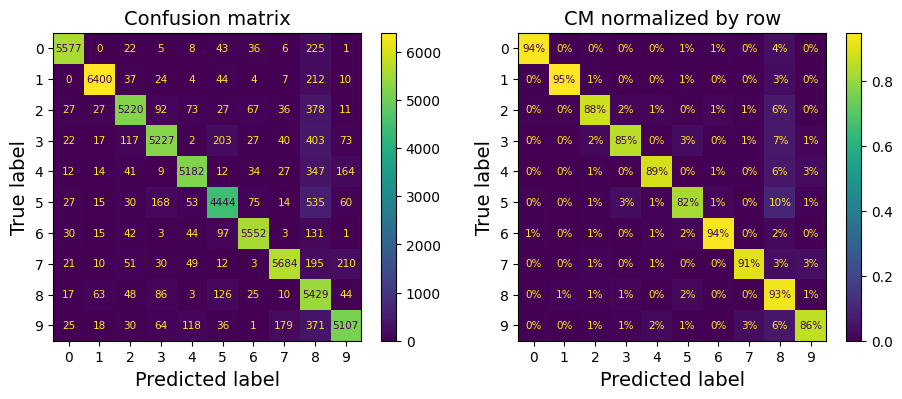

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
plt.rc('font', size=7.5)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

**올바른 분류를 시각화**
- 오른쪽 matrix:
 - 대각선으로 인스턴스들이 위치해있어 대부분의 이미지가 올바르게 분류되었음을 의미함.
 - 숫자 5의 숫자가 어두워보이는 것은 오류가 더 많이 발생했거나 데이터셋에서 숫자 5가 다른 숫자보다 적기 때문일 수 있음.
- 왼쪽 matrix:
 - 각 값을 해당 클래스(실제 클래스)의 이미지 총수로 나눠 혼동 행렬을 정규화
   - 이를 위해 `normalize="true"` 옵션을 설정할 수 있음.
   - 또한 `values_format=".0%"` 인수를 사용해 소수점 없는 백분율로 표시할 수 있음.
 - 숫자 5 이미지의 82%만이 올바르게 분류되었음을 확인할 수 있음.
 - 모델이 5의 이미지에서 가장 흔한 오류는 8로 잘못 분류한 것임. (전체 5 중 10%에 해당)
 - 그러나 8 중에서 5로 잘못 분류된 경우는 단 2%이며, 여러 숫자가 8로 잘못 분류된 것을 알 수 있음.

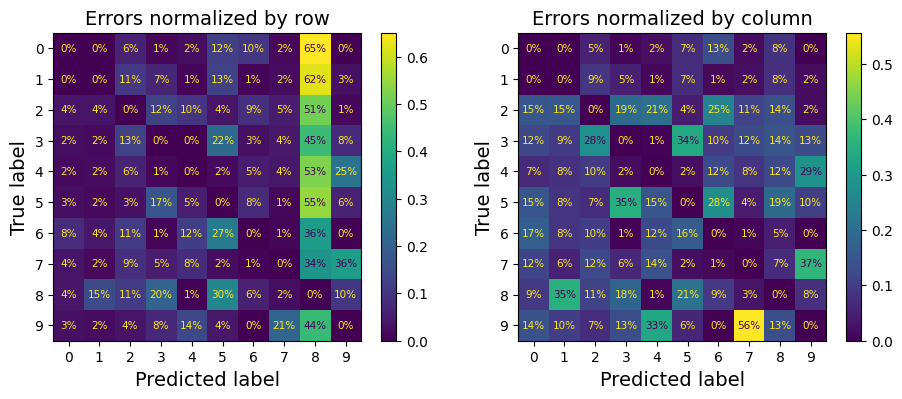

In [105]:
# 올바른 예측에 가중치를 0으로 설정하여 오류를 부각한 confusion matrix 시각화

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

**오류를 시각화**
- 오른쪽 matrix:
 - 클래스 8에 해당하는 열이 매우 밝으며, 이는 많은 이미지가 8로 잘못 분류되었음을 확인해줌.
 - 실제로 이는 거의 모든 클래스에서 가장 흔한 오류
- 백분율 해석 시 주의사항:
  - 올바른 예측을 제외하여 시각화됨
  - 예를 들어, 행 #7, 열 #9의 36%는 전체 7 이미지 중 36%가 9로 잘못 분류되었다는 뜻이 아니며, 7 이미지에서 모델이 저지른 오류 중 36%가 9로 잘못 분류된 것을 의미함.
  - 실제로 7 이미지 중 3%만이 9로 오분류됨 (CM normalized by row에서 확인)
- 왼쪽 matrix:
 - `normalize="pred"`으로 설정하여 행이 아닌 열로 정규화
 - 예를 들어, 오분류된 7의 56%가 실제로는 9임을 확인

# 실습과제

- 실습과제 제출일: 11월 7일(목) 오후 2시 59분

## 1번

**An MNIST Classifier With Over 97% Accuracy**

MNIST 데이터셋으로 classifier를 만들어 테스트 세트에서 97% accuracy을 달성해보세요.

참고사항:
- `GridSearchCV`([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))나 `RandomizedSearchCV`([doc](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))로 하이퍼파라미터 튜닝 시 `cv=5` 사용
 - `scoring` 파라미터: 지정하지 않을 시 입력된 `estimator`의 `score` 함수 사용
    - 예시: `LogisticRegression` 사용 경우, 해당 모델의 `score` 함수에서 출력하는 accuracy([doc](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score))가 자동으로 사용됨
 - 훈련 후 `.best_score_`을 통해 CV 성능 출력 기능 지원 ([doc](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html#:~:text=on%20allowed%20values.-,best_score_float,-Mean%20cross%2Dvalidated))



In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_test, _, y_test, _ = train_test_split(X_temp, y_temp, train_size=0.1, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=100, solver="saga"))
])

param_dist = {
    "classifier__C": uniform(0.001, 10),
    "classifier__penalty": ["l2"]
}

random_search = RandomizedSearchCV(
    pipeline, param_dist, cv=5, scoring=None, verbose=1, n_jobs=-1, n_iter=5, random_state=42
)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# evaluation
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'classifier__C': 9.50814306409916, 'classifier__penalty': 'l2'}
Best cross-validation accuracy: 0.9189206349206349
Test accuracy: 0.9071428571428571


## 2번

**Titanic 데이터셋 챌린지**

Titanic 데이터셋의 `Survived` 레이블을 예측할 수 있는 분류 모델을 훈련해봅니다.
- 아래의 "진행 순서"를 참고하세요.
- Baseline 모델을 정하고 그 모델보다 CV 성능이 개선된 모델을 찾는 과정을 보이세요.
  - Baseline 모델에도 데이터 전처리를 적용해야 합니다.
  - 최종 모델은 baseline 모델과는 달리 그리드 서치/랜덤 서치(하이퍼파라미터 튜닝)을 진행해야 하며 아래의 "특징 변환 및 조합" 중 최소 한가지의 데이터 변환 혹은 조합이 적용되어야 합니다. (아래 예시 이외 다른 변환이나 합성을 진행해도 됩니다.)
  - 전처리와 그리드 서치/랜덤 서치은 실습 1처럼 scikit-learn의 파이프라인을 사용하세요.
  - baseline 모델과 최종 모델이 달라도 됩니다.
  - 실습 예제처럼 다양한 성능 지표를 사용하여 모델의 성능을 분석해보세요. 최종 모델 선정에는 하나의 성능 지표를 기준으로 성능 개선이 이루어졌는지 아닌지 판단하세요.
    - Scikit-learn에서 미리 정의해놓은 성능 지표 리스트 참고 ([링크](https://scikit-learn.org/1.5/modules/model_evaluation.html#common-cases-predefined-values))
    - 모델 예측 출력 형태와 사용 메트릭의 입력 형태 유의: 어떤 모델/메트릭을 사용하느냐에 따라 `predict()`(예측 클래스 레이블 반환), `predict_proba()`(예측 클래스 확률 반환)이 다르며, 다큐멘테이션을 참고하여 적절히 사용하세요.
  - 최종 모델의 CV 성능은 83%을 넘어야 합니다.
- 최종 모델이 선정되면 테스트 성능을 평가하세요.
  - 최종 모델이 선정되어 해당 모델의 일반화 성능을 평가하기 전까지 테스트셋의 사용은 절대 금지됩니다.  
  - 재미를 위해 본인 모델의 테스트 성능을 Kaggle Titanic [리더보드](https://www.kaggle.com/c/titanic/leaderboard)와 비교하여 상위 몇퍼센트인지 가늠해볼 수 있습니다.
- 각 단계의 분석을 줄글로 작성하세요.
  - 문장 종결어미로 평서문 "-다."을 사용하세요.


진행 순서(참고용):

- 데이터 탐색
 - 데이터 복사본을 생성하여 탐색에 사용
 - 각 속성 조사:
    - 유형 (범주형, 정수/실수, 제한/무제한, 텍스트, 구조적 데이터 등)
    - 결측치 비율
    - 데이터 이상치 확인
    - 모델에 포함 여부 (유용성)
    - 분포 유형 (정규분포, 균등분포, 로그분포 등)
  - 데이터 시각화
  - 특징 간 상관관계
  - 특징 별 적용할 전처리 결정
  - 특징들을 조합하여 새로운 특징 생성 가능성 탐색
  - 내용 문서화
- 데이터 전처리 (원본 데이터셋은 그대로 유지하고, 복사본으로 작업)
 - 이상치 수정하거나 제거
 - 작업에 도움이 되지 않는 특징 제외
 - 연속형 특징 이산화(discretization)
 - 범주형 특징 변환
 - 유용한 특징 변환 추가(log(x), sqrt(x), x^2 등)
 - 특징들을 조합하여 새로운 특징 생성
 - 특징 스케일링 (표준화, 정규화 등)
 - 전처리를 순차적으로 수행하는 파이프라인 생성
- 모델 선정 (데이터가 매우 클 경우 더 많은 모델을 합리적인 시간 내에 학습시키기 위해 작은 훈련 세트 샘플링 가능)
  - 성능 지표 설정
  - 다양한 범주 (선형, 나이브 베이즈, SVM, 랜덤 포레스트, 신경망 등)에서 간단한 모델을 학습
  - 성능을 측정하고 비교: 각 모델에 대해 k-fold CV을 사용하고, 성능 지표의 평균과 표준 편차를 계산(optional: boxplot을 통해 시각화)
  - 각 알고리즘에서 중요한 변수를 분석
  - 모델이 만드는 오류 유형을 분석
  - 모델 중에서 상위 3~5개의 유망한 모델을 선정
- 모델 조정(가능한 한 많은 데이터를 사용)
  - CV을 사용하여 하이퍼파라미터를 조정
    - 이 단계까지 테스트 세트 사용 절대 금지
  - 최종 모델을 선정하여 테스트 세트 성능을 측정




```python
# (optional) 10fold CV 결과를 box plot으로 시각화:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, 모델1_CV결과, ".") # 변경하여 사용
plt.plot([2]*10, 모델2_CV결과, ".") # 변경하여 사용
plt.boxplot([모델1_CV결과, 모델2_CV결과], labels=("모델1", "모델2")) # 변경하여 사용
plt.ylabel("Accuracy")
plt.show()
```



In [4]:
# 데이터 로드
train_data = pd.read_csv("https://github.com/inikoreaackr/ml_datasets/raw/main/titanic_train.csv")
test_data = pd.read_csv(("https://github.com/inikoreaackr/ml_datasets/raw/main/titanic_test.csv"))

In [5]:
# 훈련 세트 인스턴스 출력:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


특성 목록:
- `PassengerId`: 각 승객의 고유 식별자
- `Survived`: 타깃 클래스. 0은 승객이 생존하지 못했음을 의미하고, 1은 생존했음을 의미
- `Pclass`: 객실 등급.
- `Name`, `Sex`, `Age`: 이름, 성별, 나이
- `SibSp`: 타이타닉 호에 탑승한 승객의 형제자매 및 배우자 수.
- `Parch`: 타이타닉에 탑승한 승객의 자녀 및 부모 수.
- `Ticket`: 티켓 ID
- `Fare`: 지불한 가격(파운드)
- `Cabin`: 승객의 객실 번호
- `Embarked`: 승객이 타이타닉 호에 승선한 장소

특징 변환 및 조합 예시:
- 숫자 특성을 범주 특성으로 변환 (연령대별)
- 혼자 여행하는 사람 특성 추가
- `SibSp`와 `Parch` 조합
- `Survived` 레이블과 잘 연관되는 `Name` 부분 추출 및 범주 축소 (Mr, Mrs, Miss, Master, Dr 등)
- `Cabin` 열을 사용 (예를 들어 첫 글자를 가져와 범주형 속성으로 처리)

In [6]:
# PassengerId 열을 인덱스 열로 설정
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [11]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin

train_data = pd.read_csv("https://github.com/inikoreaackr/ml_datasets/raw/main/titanic_train.csv")
test_data = pd.read_csv("https://github.com/inikoreaackr/ml_datasets/raw/main/titanic_test.csv")
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

class TitleExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        titles = X["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
        return titles.values.reshape(-1, 1)

class AloneFeatureAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        alone = ((X["SibSp"] == 0) & (X["Parch"] == 0)).astype(int)
        return alone.values.reshape(-1, 1)

class Discretizer(BaseEstimator, TransformerMixin):
    def __init__(self, column, bins, labels):
        self.column = column
        self.bins = bins
        self.labels = labels
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.cut(X[self.column], bins=self.bins, labels=self.labels).values.reshape(-1, 1)

numeric_features = ["Age", "Fare"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_features = ["Sex", "Embarked", "Pclass"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("title", Pipeline([
            ("title_extract", TitleExtractor()),
            ("title_onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), ["Name"]),
        ("alone", AloneFeatureAdder(), ["SibSp", "Parch"]),
        ("age_discretizer", Pipeline([
            ("age_discretize", Discretizer("Age", bins=[0, 12, 18, 60, 80], labels=["Child", "Teen", "Adult", "Senior"])),
            ("age_onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), ["Age"]),
        ("fare_discretizer", Pipeline([
            ("fare_discretize", Discretizer("Fare", bins=[0, 7.91, 14.45, 31, 513], labels=["Low", "Mid", "High", "VeryHigh"])),
            ("fare_onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), ["Fare"])
    ]
)

# Baseline : Logistic Regression
baseline_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

baseline_scores = cross_val_score(baseline_model, X, y, cv=5, scoring="accuracy")
print("Baseline Model Accuracy:", baseline_scores.mean())

# final : Random forest
final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(final_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)

# evaluation
best_model = grid_search.best_estimator_
final_scores = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")
print("Final Model CV Accuracy:", final_scores.mean())

Baseline Model Accuracy: 0.8058565061829139
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Final Model CV Accuracy: 0.839507877722679


약 0.03의 정확도가 향상한 것을 확인할 수 있음